In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = 2*np.random.rand(100,1)
y = 6 + 4*x + np.random.rand(100,1)

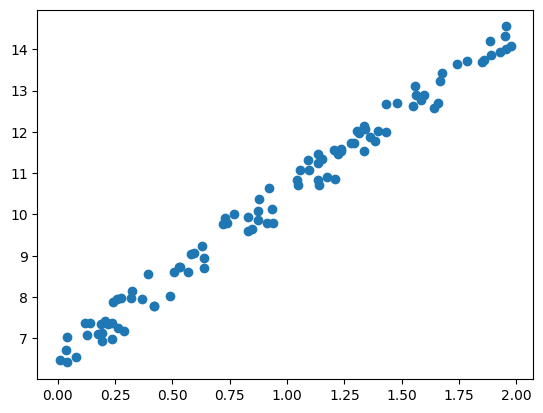

In [10]:
plt.scatter(x,y)

In [11]:
w1 = np.zeros((1,1))
print(w1)
print(np.zeros_like(w1))

[[0.]]
[[0.]]


In [12]:
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(x,w1.T) + w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))

    w1_update = -(2/N) * learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [13]:
def gradient_descent_steps(x,y, iters=10000):
    w0 = np.zeros((1,1)) #[[0.]]
    w1 = np.zeros((1,1)) #[[0.]]

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,x,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0


In [14]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
    

In [15]:
iters=[100,200,300,400,500,600,700,800,900,1000]
for i in iters:
    w1, w0 = gradient_descent_steps(x,y, iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred = w1[0,0]*x + w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:4.980, w0:5.256
Gradient Descent Total Cost:0.5360
w1:4.758, w0:5.665
Gradient Descent Total Cost:0.3049
w1:4.541, w0:5.912
Gradient Descent Total Cost:0.1962
w1:4.383, w0:6.090
Gradient Descent Total Cost:0.1392
w1:4.269, w0:6.219
Gradient Descent Total Cost:0.1093
w1:4.186, w0:6.313
Gradient Descent Total Cost:0.0936
w1:4.126, w0:6.380
Gradient Descent Total Cost:0.0853
w1:4.083, w0:6.429
Gradient Descent Total Cost:0.0810
w1:4.051, w0:6.465
Gradient Descent Total Cost:0.0787
w1:4.028, w0:6.490
Gradient Descent Total Cost:0.0775


In [24]:
for i in range(1000):
    w1, w0 = gradient_descent_steps(x,y, iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred = w1[0,0]*x + w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:0.000, w0:0.000
Gradient Descent Total Cost:111.6167
w1:0.221, w0:0.206
Gradient Descent Total Cost:102.6528
w1:0.433, w0:0.404
Gradient Descent Total Cost:94.4138
w1:0.637, w0:0.594
Gradient Descent Total Cost:86.8412
w1:0.831, w0:0.776
Gradient Descent Total Cost:79.8809
w1:1.017, w0:0.951
Gradient Descent Total Cost:73.4834
w1:1.196, w0:1.119
Gradient Descent Total Cost:67.6033
w1:1.367, w0:1.280
Gradient Descent Total Cost:62.1985
w1:1.530, w0:1.435
Gradient Descent Total Cost:57.2308
w1:1.687, w0:1.584
Gradient Descent Total Cost:52.6646
w1:1.837, w0:1.726
Gradient Descent Total Cost:48.4676
w1:1.981, w0:1.863
Gradient Descent Total Cost:44.6098
w1:2.118, w0:1.995
Gradient Descent Total Cost:41.0638
w1:2.250, w0:2.121
Gradient Descent Total Cost:37.8043
w1:2.376, w0:2.242
Gradient Descent Total Cost:34.8083
w1:2.497, w0:2.359
Gradient Descent Total Cost:32.0543
w1:2.612, w0:2.471
Gradient Descent Total Cost:29.5228
w1:2.723, w0:2.578
Gradient Descent Total Cost:27.1958
w1:2.829

In [22]:
def stochastic_gradient_descent_steps(x,y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1)) #[[0.]]
    w1 = np.zeros((1,1)) #[[0.]]

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0,sample_x,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [27]:
for i in range(1000):
    w1, w0 = stochastic_gradient_descent_steps(x,y, iters=i)
    print(f"w1:{w1[0,0]:.3f}, w0:{w0[0,0]:.3f}")
    y_pred = w1[0,0]*x + w0
    print(f"Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}")

w1:0.000, w0:0.000
Gradient Descent Total Cost:111.6167
w1:0.136, w0:0.181
Gradient Descent Total Cost:104.9738
w1:0.336, w0:0.379
Gradient Descent Total Cost:96.8903
w1:0.588, w0:0.584
Gradient Descent Total Cost:87.9813
w1:0.791, w0:0.770
Gradient Descent Total Cost:80.7442
w1:0.923, w0:0.928
Gradient Descent Total Cost:75.5586
w1:1.198, w0:1.122
Gradient Descent Total Cost:67.5241
w1:1.382, w0:1.289
Gradient Descent Total Cost:61.8151
w1:1.522, w0:1.440
Gradient Descent Total Cost:57.2907
w1:1.700, w0:1.594
Gradient Descent Total Cost:52.3166
w1:1.916, w0:1.751
Gradient Descent Total Cost:47.0160
w1:2.084, w0:1.892
Gradient Descent Total Cost:42.8408
w1:2.204, w0:2.019
Gradient Descent Total Cost:39.6407
w1:2.348, w0:2.145
Gradient Descent Total Cost:36.2882
w1:2.458, w0:2.263
Gradient Descent Total Cost:33.5865
w1:2.576, w0:2.379
Gradient Descent Total Cost:30.9225
w1:2.666, w0:2.487
Gradient Descent Total Cost:28.7545
w1:2.776, w0:2.594
Gradient Descent Total Cost:26.4639
w1:2.848

## sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

## sklearn.linear_model.SGDRegressor
* class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False) 

eta, power_t: learning rate



In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()
X = [[174], [152], [138], [128], [186]]
y = [71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[165]]))

[67.30998637]


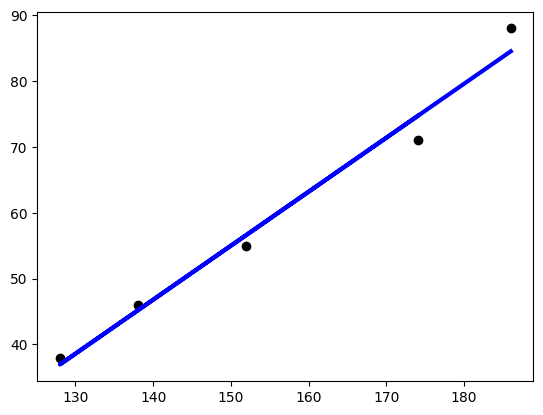

In [38]:
plt.scatter(X,y,color='black')

y_pred = reg.predict(X)
plt.plot(X,y_pred,color='blue', linewidth=3)
plt.show()

In [39]:
reg.coef_

array([0.82021132])